<a href="https://colab.research.google.com/github/amnaahmad20/Basic-statistics-and-analysis-using-R/blob/main/R_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#task 1

In [1]:
# Install packages
install.packages("zoo")
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [19]:
# Install ggpubr
install.packages("ggpubr")

# Load the ggpubr package
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [3]:
install.packages("modeest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’




In [4]:
install.packages("knitr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xfun’




In [5]:
# Load the necessary packages
library(readr)
library(dplyr)
library(ggplot2)
library(zoo)
library(modeest)
library(knitr)

# Load the data
sp_data <- read_csv("/content/S&P 500.csv")
bitcoin_data <- read_csv("/content/BTC-USD.csv")

# Check date formats and data types again
print(str(sp_data))
print(str(bitcoin_data))


# Inspect the first few rows of the datasets
head(sp_data)
head(bitcoin_data)


Rows: 1258 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
num (1): Price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1827 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (1): price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [1,258 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date : chr [1:1258] "2/04/2019" "3/04/2019" "4/04/2019" "5/04/2019" ...
 $ Price: num [1:1258] 2867 2873 2879 2893 2896 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Price = col_number()
  .. )
 - attr(*, "problems")=<externalptr> 
NULL
spc_tbl_ [1,827 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date : chr [1:1827] "02/04/2019" "03/04/2019" "04/04/2019" "05/04/2019" ...
 $ price: num [1:1827] 4880 4973 4923 5037 5060 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   price = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
NULL


Date      Price  
1 2/04/2019 2867.24
2 3/04/2019 2873.40
3 4/04/2019 2879.39
4 5/04/2019 2892.74
5 8/04/2019 2895.77
6 9/04/2019 2878.20

Date       price   
1 02/04/2019 4879.878
2 03/04/2019 4973.022
3 04/04/2019 4922.799
4 05/04/2019 5036.681
5 06/04/2019 5059.817
6 07/04/2019 5198.897

In [6]:
# Define a function to calculate all relevant statistics
calculate_stats <- function(data, price_col) {
  stats <- data %>%
    summarise(
      Mean = mean({{price_col}}, na.rm = TRUE),
      Median = median({{price_col}}, na.rm = TRUE),
      Mode = as.numeric(mfv({{price_col}})[1]),  # Take the first mode value if multiple
      Range = max({{price_col}}, na.rm = TRUE) - min({{price_col}}, na.rm = TRUE),
      Standard_Deviation = sd({{price_col}}, na.rm = TRUE),
      Variance = var({{price_col}}, na.rm = TRUE)
    )
  return(stats)
}

# Calculate statistics for S&P 500
sp_stats <- calculate_stats(sp_data, Price)

# Calculate statistics for Bitcoin
bitcoin_stats <- calculate_stats(bitcoin_data, price)

# Print the results in a more visual way using knitr::kable()
cat("S&P 500 Descriptive Statistics\n")
print(knitr::kable(sp_stats))

cat("\nBitcoin Descriptive Statistics\n")
print(knitr::kable(bitcoin_stats))


S&P 500 Descriptive Statistics


|     Mean|  Median|    Mode|   Range| Standard_Deviation| Variance|
|--------:|-------:|-------:|-------:|------------------:|--------:|
| 3867.881| 3971.18| 2926.46| 3016.95|           643.1942| 413698.8|

Bitcoin Descriptive Statistics


|     Mean|   Median|     Mode|    Range| Standard_Deviation|  Variance|
|--------:|--------:|--------:|--------:|------------------:|---------:|
| 27097.76| 25576.39| 4879.878| 68203.62|           16711.71| 279281159|


#Central Tendency (Mean, Median, Mode)
##Mean:
S&P 500: 3867.881
Bitcoin: 27097.76
Interpretation: Bitcoin's average price is significantly higher than that of the S&P 500, suggesting that on average, Bitcoin's trading price is higher over the observed period.
##Median:
S&P 500: 3971.18
Bitcoin: 25576.39
Interpretation: Similar to the mean, the median price of Bitcoin is much higher than the S&P 500. The median being lower than the mean in Bitcoin’s case suggests a right-skewed distribution, where higher prices pull the mean upwards more than the median.
##Mode:
S&P 500: 2926.46
Bitcoin: 4879.878
Interpretation: The mode, or most frequently occurring price, is also much lower for the S&P 500 compared to Bitcoin. The mode's position much below the mean and median for Bitcoin again suggests a skewed distribution, possibly with significant price spikes.

#Variability (Range, Standard Deviation, Variance)
##Range:
S&P 500: 3016.95
Bitcoin: 68203.62
Interpretation: Bitcoin shows a much wider range than the S&P 500, indicating that Bitcoin’s prices fluctuated over a much larger scale. This points to higher volatility in the Bitcoin market.
##Standard Deviation:
S&P 500: 643.1942
Bitcoin: 16711.71
Interpretation: Bitcoin's standard deviation is substantially higher than that of the S&P 500, confirming that Bitcoin prices are more spread out from the mean, which is indicative of higher volatility.
##Variance:
S&P 500: 413698.8
Bitcoin: 279281159
Interpretation: The variance, like standard deviation, is much higher for Bitcoin. A higher variance indicates a wider dispersion of price values around the mean, reinforcing the notion of Bitcoin as a more volatile asset.

#task 2

In [7]:
# Ensure the Date columns are in Date format
sp_data$Date <- as.Date(sp_data$Date)
bitcoin_data$Date <- as.Date(bitcoin_data$Date)

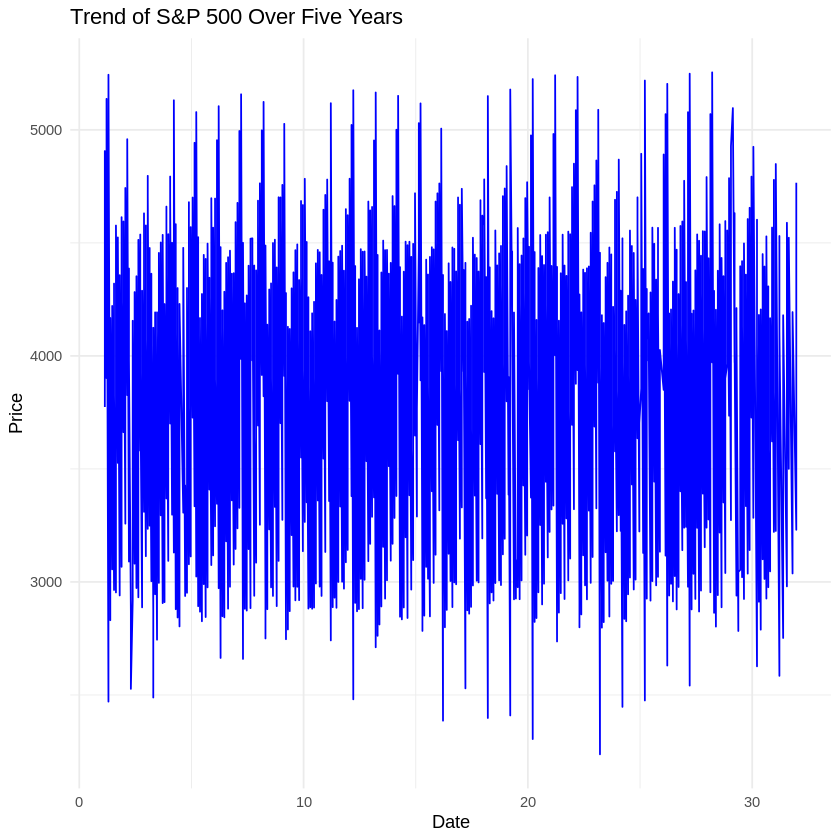

In [8]:
# Plotting S&P 500 trend
ggplot(sp_data, aes(x = Date, y = Price)) +
  geom_line(color = 'blue') +
  labs(title = "Trend of S&P 500 Over Five Years", x = "Date", y = "Price") +
  theme_minimal()




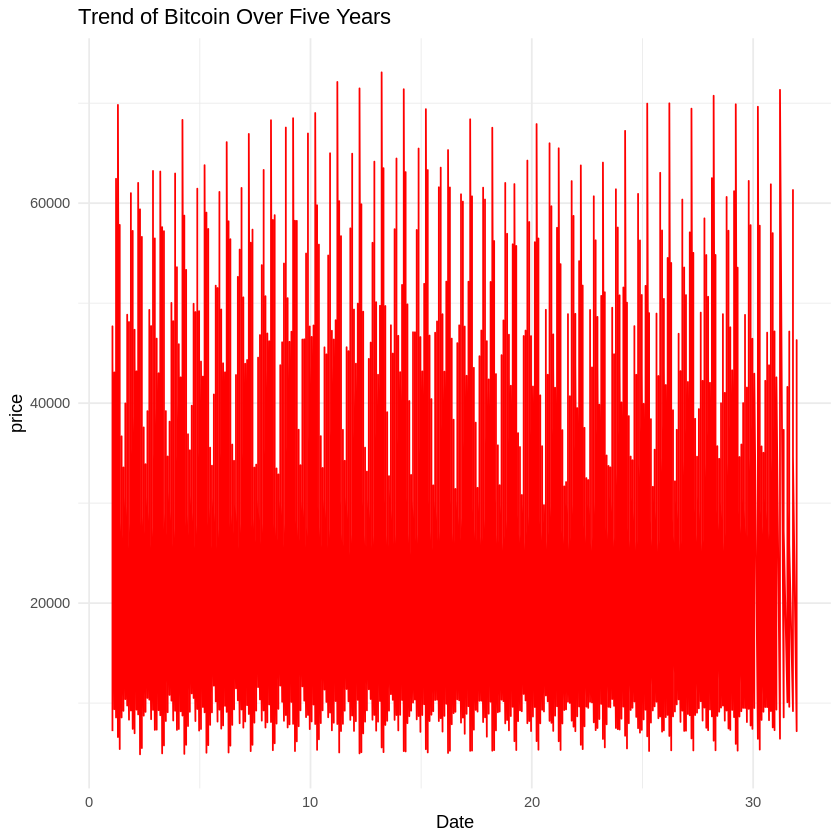

In [9]:
# Plotting Bitcoin trend
ggplot(bitcoin_data, aes(x = Date, y = price)) +
  geom_line(color = 'red') +
  labs(title = "Trend of Bitcoin Over Five Years", x = "Date", y = "price") +
  theme_minimal()

The S&P 500 plot shows whether there has been a steady increase, decrease, or fluctuation over the period. Generally, stock indexes like the S&P 500  show upward trends with occasional dips.
The Bitcoin plot shows more volatility with potentially higher peaks and deeper troughs, reflecting the high-risk high-return nature of cryptocurrencies.

Warning message:
“Removed 181 rows containing missing values (`geom_line()`).”


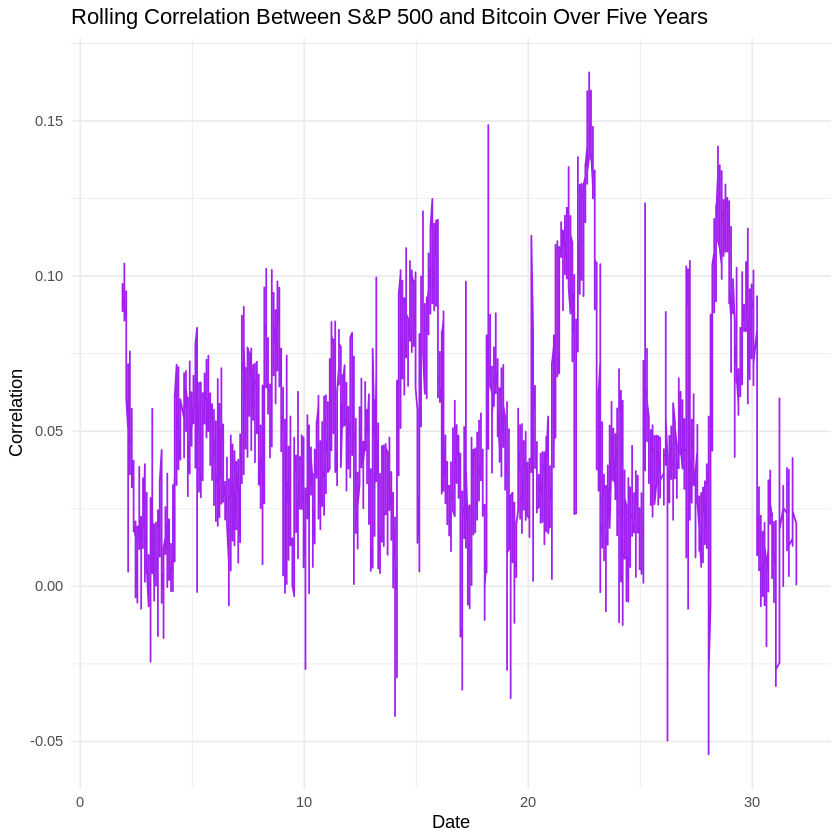

In [10]:
# Merge data based on Date
combined_data <- merge(sp_data, bitcoin_data, by = "Date")

# Ensure that data frame is sorted by date to correctly calculate rolling windows
combined_data <- combined_data %>% arrange(Date)

# Calculate the rolling correlation correctly
combined_data$RollingCorrelation <- rollapply(width = 182,
                                              data = combined_data[, c("Price", "price")],
                                              FUN = function(x) {
                                                # Ensure the input to cor() is correctly formatted
                                                if (ncol(x) == 2) {
                                                  cor(x[, 1], x[, 2], use = "complete.obs")
                                                } else {
                                                  NA  # Return NA if there's any issue with the data input
                                                }
                                              },
                                              by.column = FALSE,
                                              align = "right",
                                              fill = NA)

# Plotting the rolling correlation
ggplot(combined_data, aes(x = Date, y = RollingCorrelation)) +
  geom_line(color = 'purple') +
  labs(title = "Rolling Correlation Between S&P 500 and Bitcoin Over Five Years",
       x = "Date", y = "Correlation") +
  theme_minimal()


#Task 3

In [12]:
# Check for any NA values and remove rows with NA values if any
combined_data <- na.omit(combined_data)

# Ensure that both columns are numeric
#combined_data$Price_sp <- as.numeric(combined_data$Price_sp)
#combined_data$Price_btc <- as.numeric(combined_data$Price_btc)

# Check the head of the merged dataset to confirm successful merge
print(head(combined_data))
print(nrow(combined_data))


       Date   Price     price RollingCorrelation
182 1-11-20 4613.67 20485.273         0.08846531
183 1-11-20 4613.67 61004.406         0.09750796
184 1-11-20 4613.67  9261.104         0.09137134
185 1-11-20 4613.67 35437.254         0.09258953
186 1-12-20 3662.45 57229.828         0.09037532
187 1-12-20 3662.45 38688.750         0.08785850
[1] 6106


In [13]:
print(paste("Length of S&P 500 Prices:", length(combined_data$Price)))
print(paste("Length of Bitcoin Prices:", length(combined_data$price)))
print(paste("Type of S&P 500 Prices:", class(combined_data$Price)))
print(paste("Type of Bitcoin Prices:", class(combined_data$price)))

[1] "Length of S&P 500 Prices: 6106"
[1] "Length of Bitcoin Prices: 6106"
[1] "Type of S&P 500 Prices: numeric"
[1] "Type of Bitcoin Prices: numeric"


In [15]:
# Compute the correlation coefficient
correlation_coefficient <- cor(combined_data$Price, combined_data$price, use = "complete.obs")
print(paste("Correlation Coefficient between S&P 500 and Bitcoin:", correlation_coefficient))



[1] "Correlation Coefficient between S&P 500 and Bitcoin: 0.0486328135112984"


`geom_smooth()` using formula = 'y ~ x'


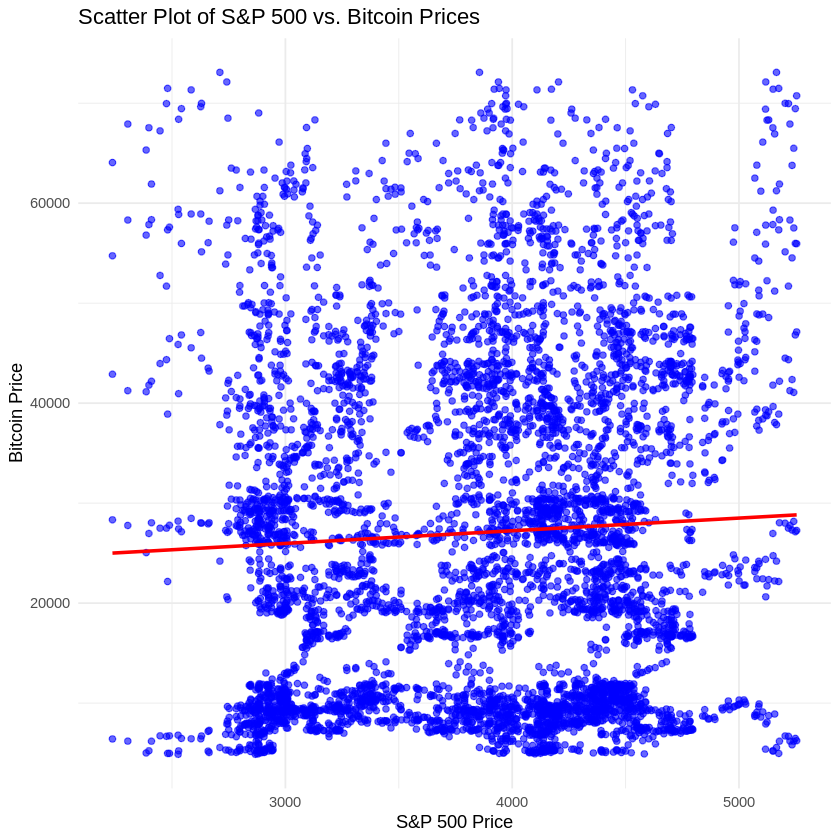

In [17]:
# Scatter plot of S&P 500 prices vs. Bitcoin prices
ggplot(combined_data, aes(x = Price, y = price)) +
  geom_point(alpha = 0.6, color = 'blue') +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Scatter Plot of S&P 500 vs. Bitcoin Prices",
       x = "S&P 500 Price",
       y = "Bitcoin Price") +
  theme_minimal()



#Correlation Coefficient:
A value close to 1 indicates a strong positive correlation, meaning as S&P 500 prices go up, Bitcoin prices also tend to go up.
A value close to -1 indicates a strong negative correlation, meaning as S&P 500 prices go up, Bitcoin prices tend to go down.
A value close to 0 suggests a weak or no linear relationship.

Hence it is weak or no linear relationship.

#Scatter Plot Analysis:
The geom_smooth(method = "lm") line (red line) shows the best fit linear trend line through the data, providing a visual aid to understand the correlation.

#Task 4
Assess whether the S&P data and Bitcoin data follow a normal distribution. Analyze each dataset separately and interpret the findings

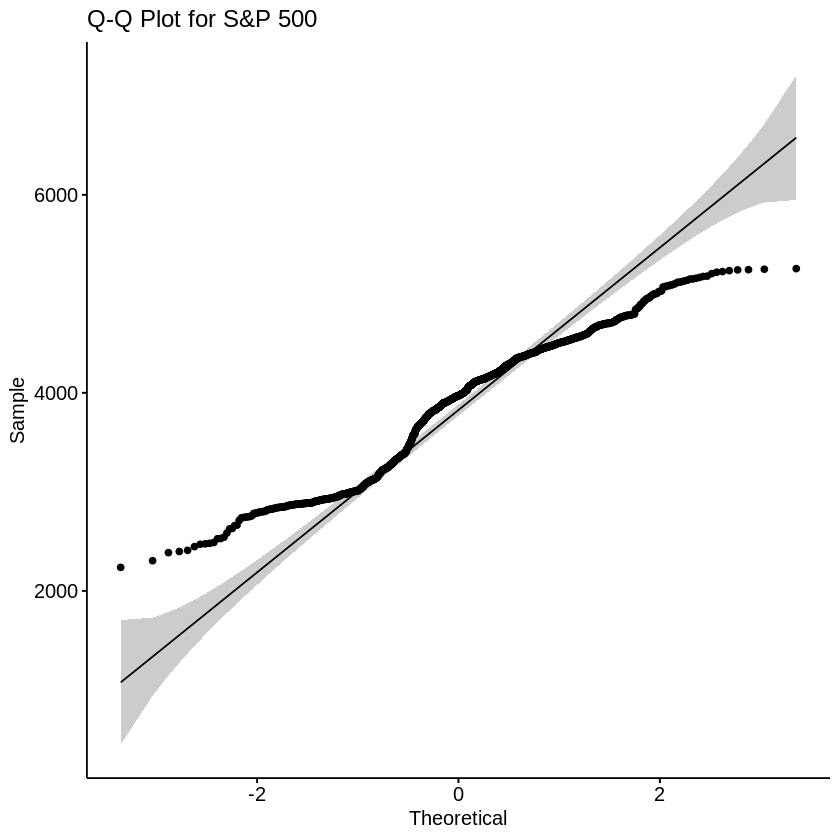

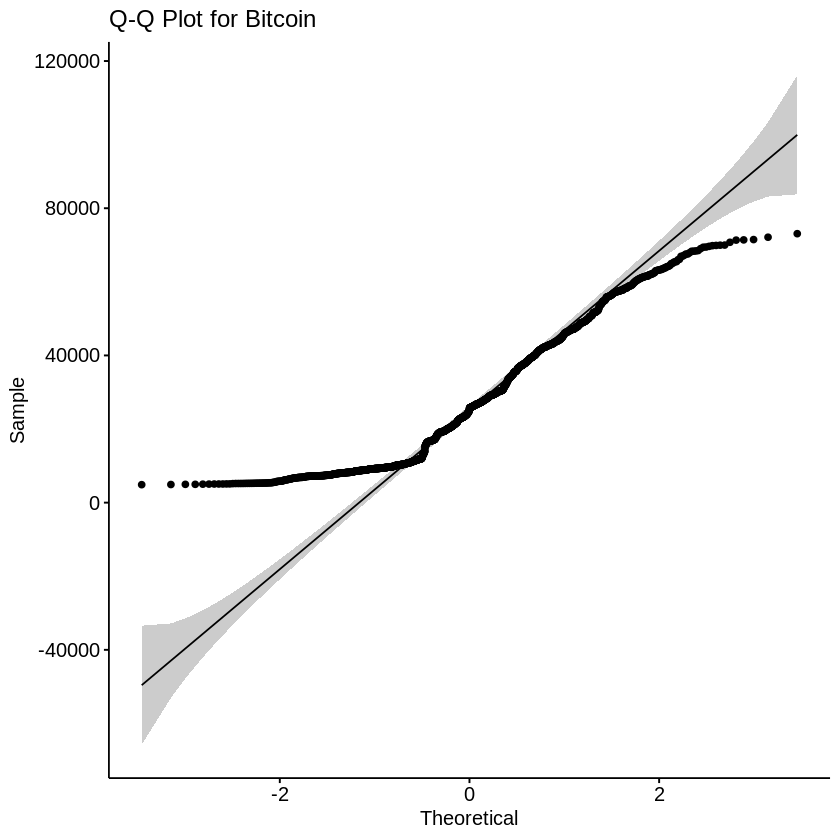

In [20]:
# Q-Q plot for S&P 500
ggqqplot(sp_data$Price, title = "Q-Q Plot for S&P 500")

# Q-Q plot for Bitcoin
ggqqplot(bitcoin_data$price, title = "Q-Q Plot for Bitcoin")

#Bitcoin Q-Q Plot Interpretation:
*   The plot shows that the data points deviate significantly from the line, especially at the ends, which indicates that the distribution has heavier tails than a normal distribution.
*   There is a pronounced curve away from the normal line, suggesting that the Bitcoin prices have a skewed distribution with a lot of data concentrated on one side of the mean and a long tail on the other side.
* The S-shaped curve indicates that the distribution has more extreme values (both high and low) than what would be expected in a normal distribution, which is characteristic of "fat tails".


#S&P 500 Q-Q Plot Interpretation:
* Similar to the Bitcoin plot, there is a noticeable deviation from the line, particularly at the tails, suggesting that the S&P 500 data also have heavier tails than a normal distribution.
* The curvature, especially on the upper tail, indicates that the S&P 500 data is right-skewed, with a long tail of higher values.
* The middle portion of the plot, which is relatively closer to the line, indicates that a large portion of the data does follow a pattern similar to a normal distribution, but the distribution overall is not normal due to the deviations at the tails.